<a href="https://colab.research.google.com/github/mkumar84/Bankuptcy-Prediction/blob/master/Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment 823

## 1.0 import and EDA

### 1.1 Import Packages

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
import itertools

import scipy
import pickle

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
#plot model

from sklearn.preprocessing import MinMaxScaler
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
InteractiveShell.ast_node_interactivity = "all"

In [0]:
# Pandas by default tries to hide columns for better display, setting defaults to show as many columns and rows as 500
# and if a column happens to be really wide show up to 1000 character length
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
from google.colab import files
uploaded = files.upload()

bankdata = pd.read_csv("bankdata_RNN.csv")
bankdata_V2 = pd.read_csv("bankdata_RNN.csv")

### 1.2 Some light EDA

In [0]:
attribs = bankdata_V2.columns.values.tolist()

In [18]:
attribs

['Company#',
 'Data Year - Fiscal',
 "Tobin's Q",
 'EPS',
 'Liquidity',
 'Profitability',
 'Productivity',
 'Leverage Ratio',
 'Asset Turnover',
 'Operational Margin',
 'Return on Equity',
 'Market Book Ratio',
 'Assets Growth',
 'Sales Growth',
 'Employee Growth',
 'CompanyAge',
 'BK']

In [0]:
#Dataframes to visualize bankruptcy with each ratios
Pairplot_1_df = bankdata_V2[['Data Year - Fiscal',
 "Tobin's Q",
 'EPS',
 'Liquidity',
 'Profitability',
 'BK']]

In [0]:
Pairplot_2_df = bankdata_V2[[ 'Asset Turnover',
 'Operational Margin',
 'Return on Equity',
 'Market Book Ratio',
 'BK']]

In [0]:
Pairplot_3_df = bankdata_V2[[  'Assets Growth',
 'Sales Growth',
 'Employee Growth',
 'CompanyAge', 'BK']]

In [25]:
bankdata_V2.describe()

,Company#,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,CompanyAge,BK
count,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000,9.287200e+04,92872.000000,92872.000000,92872.000000,92872.000000,92872.000000
mean,3241.480823,2004.105888,25.369008,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,10.589521,0.006008
std,2362.786409,9.875926,901.593108,2195.408187,121.449095,676.329485,35.837804,253.002670,2.113130,207.944933,352.581715,2.605564e+04,71.058323,171.104232,13.532570,8.792132,0.077280
min,1.000000,1979.000000,0.009283,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,1.000000,0.000000
25%,1050.000000,1998.000000,1.120000,-0.140000,0.020000,-0.650000,-0.060000,0.000000,0.390000,-0.100000,-0.080000,1.122000e+01,-0.041112,-0.021171,-0.038836,4.000000,0.000000
50%,3017.000000,2006.000000,1.540000,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.838000e+01,0.067076,0.076081,0.030611,8.000000,0.000000
75%,5119.000000,2012.000000,2.600000,1.530000,0.400000,0.310000,0.110000,0.820000,1.380000,0.130000,0.070000,2.409850e+02,0.264090,0.273874,0.191466,15.000000,0.000000
max,8153.000000,2017.000000,194537.670000,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,39.000000,1.000000


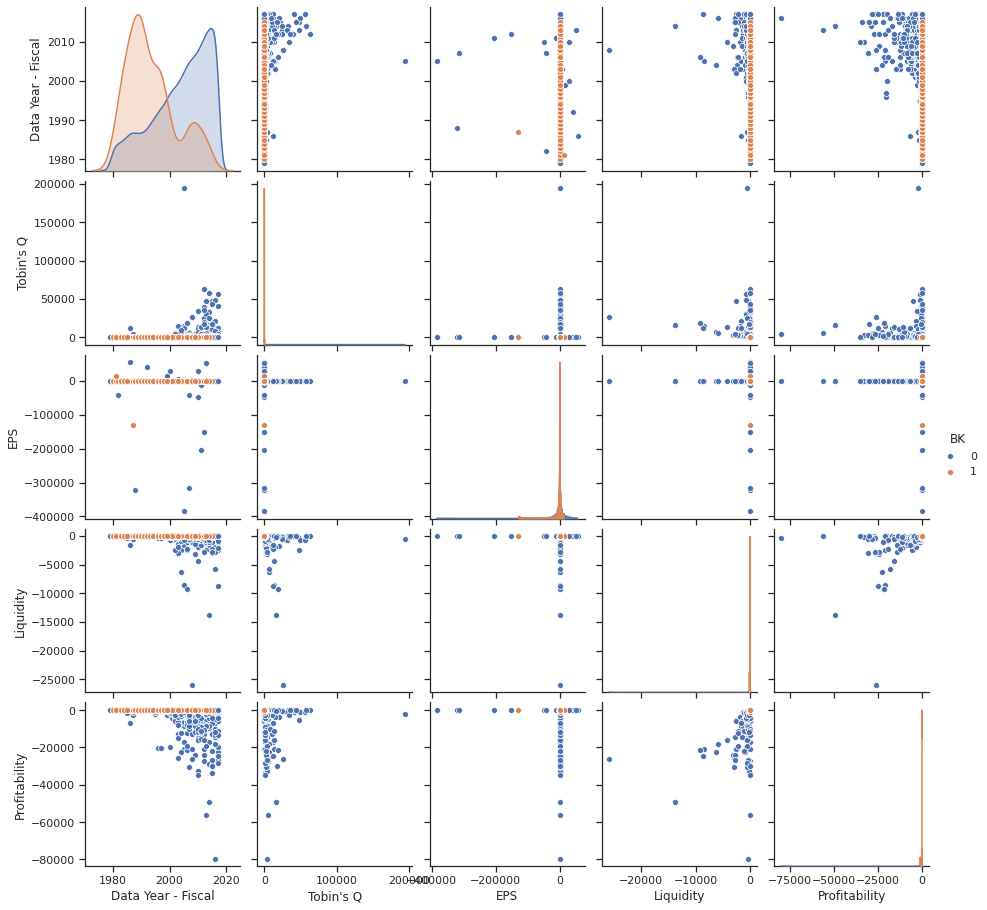

In [27]:
## check out distribution of non loyal to loyal with various features
sns.set(style="ticks")
sns.pairplot(Pairplot_1_df, hue='BK');

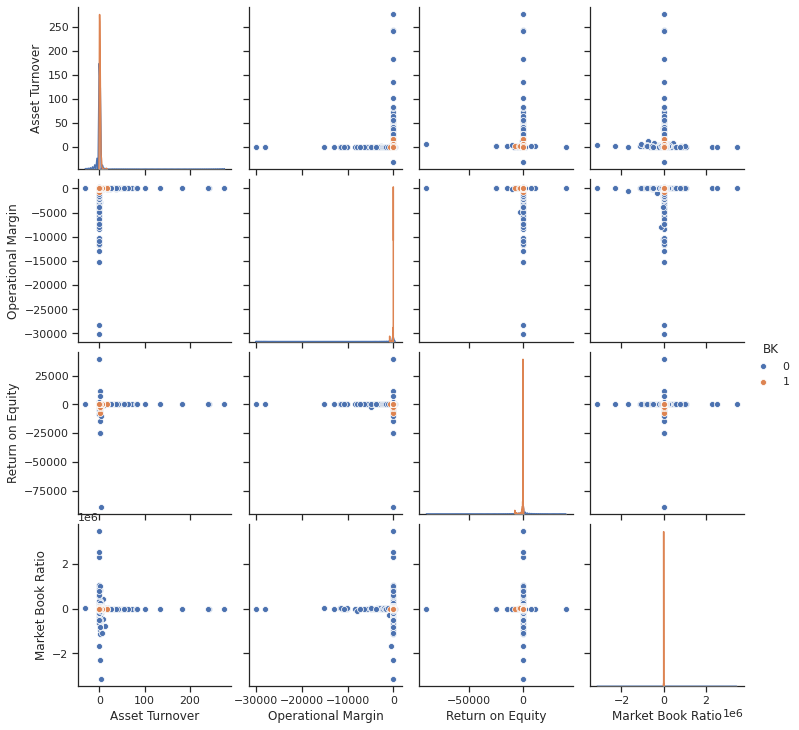

In [28]:
## check out distribution of non loyal to loyal with various features
sns.set(style="ticks")
sns.pairplot(Pairplot_2_df, hue="BK");

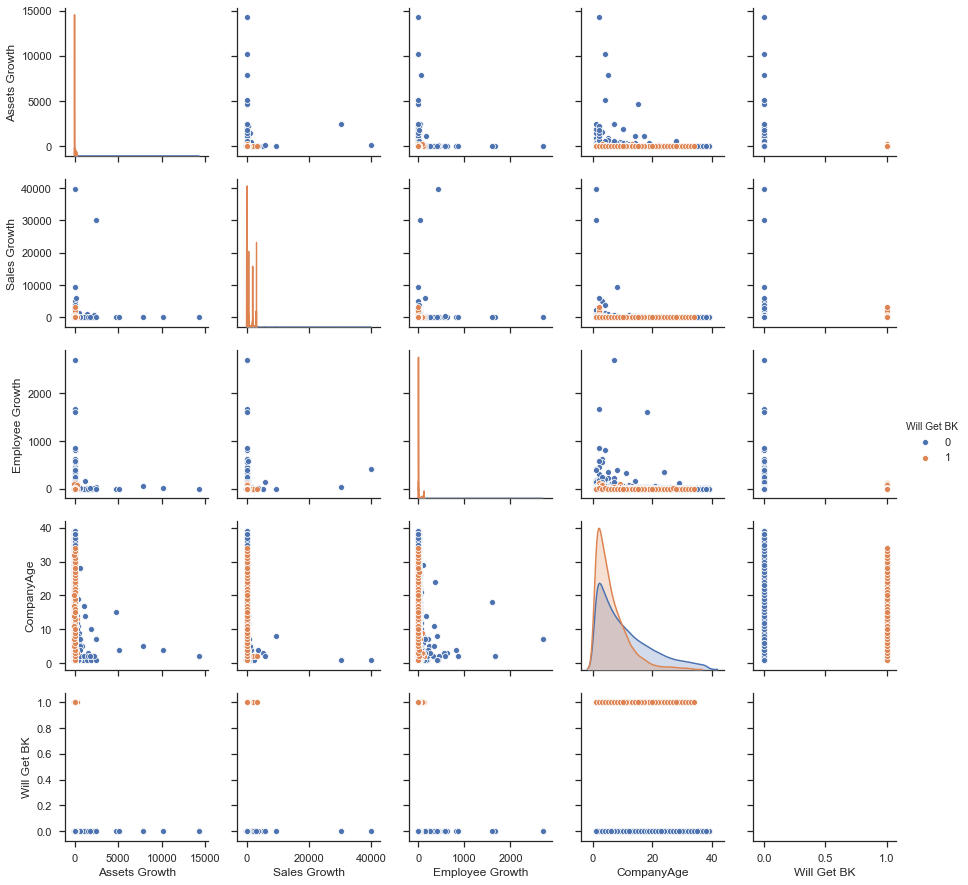

In [0]:
## check out distribution with various features
sns.set(style="ticks")
sns.pairplot(Pairplot_3_df, hue="Will Get BK");

In [0]:
#pickled the file on the next cell so no need to run this again
#profile = ProfileReport(bankdata, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [0]:
#with open('eda_profile_report.pkl', 'wb') as output:
    
    #pickle.dump(profile, output, pickle.HIGHEST_PROTOCOL)

In [31]:
# Load pandas report from saved pickle

with open('eda_profile_report.pkl', 'rb') as input:
    profile = pickle.load(input)


profile

FileNotFoundError: ignored

#### Also made an excel sheet with a pivot table to look at average between both

## 2.0 Modelling

### 2.1 Split data into Train/Test split

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

Companies_not_bankrupt = bankdata_V2[bankdata_V2['BK']==0]['Company#'].unique()
Companies_bankrupt = bankdata_V2[bankdata_V2['BK']==1]['Company#'].unique()


#First Create X and y for all companies that have never been bankrupt
X = bankdata_V2[bankdata_V2['Company#'].isin(Companies_not_bankrupt)].drop("BK", axis=1)
y = bankdata_V2[bankdata_V2['Company#'].isin(Companies_not_bankrupt)]["BK"].copy()


# create subset train and test split
X_train_sub1, X_test_sub1, y_train_sub1, y_test_sub1 = train_test_split(X, y, test_size=0.2, random_state=42)

    
#Second Create X and y for all companies that have been bankrupt
X = bankdata_V2[bankdata_V2['Company#'].isin(Companies_bankrupt)].drop("BK", axis=1)
y = bankdata_V2[bankdata_V2['Company#'].isin(Companies_bankrupt)]["BK"].copy()

# create subset train and test split
X_train_sub2, X_test_sub2, y_train_sub2, y_test_sub2 = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
# Merge subsets into one train and test set

X_train = pd.concat([X_train_sub1,X_train_sub2])
X_test = pd.concat([X_test_sub1,X_test_sub2])
y_train = pd.concat([y_train_sub1,y_train_sub2])
y_test = pd.concat([y_test_sub1,y_test_sub2])


In [36]:
# check after split if test and train contain companie sin both, should be mutually exclusive
companies_in_X_Train = X_train['Company#'].unique()
companies_in_X_test = X_test['Company#'].unique()
matching_companies = np.isin(companies_in_X_Train, companies_in_X_test)
companies_in_X_Train[matching_companies]

array([1629,  817, 3374, ..., 7907, 7994, 7971])

### 2.2 Scale the data for processing

In [37]:
data_training = X_train.drop(['Company#', 'BK'], axis = 1)
data_test = X_test.drop(['Company#', 'BK'], axis = 1)

KeyError: ignored

In [0]:
scaler = MinMaxScaler()
features = data_training.columns.values
data_training[features] = scaler.fit_transform(data_training[features])

data_test[features] = scaler.fit_transform(data_test[features])

In [0]:
from imblearn.over_sampling import SMOTE
data_training_RS,y_train_RS = SMOTE(random_state=42).fit_resample(data_training,y_train)

Using TensorFlow backend.


# 3.0 Train NN models

## 3.1 Using LSTM model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dropout

model_lstm = Sequential()

model_lstm.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, activation='tanh',input_shape=(1,data_training_RS.shape[1])))
model_lstm.add(Dense(1,activation='sigmoid'))
adm = Adam(lr=0.001)
model_lstm.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                6144      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 6,177
Trainable params: 6,177
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# turn into numpy arrays and reshape

X_train = np.reshape(data_training_RS.values,(data_training_RS.values.shape[0], 1, data_training_RS.values.shape[1]))
X_test = np.reshape(data_test.values, (data_test.values.shape[0], 1, data_test.values.shape[1]))

In [0]:
history = model_lstm.fit(X_train, y_train_RS.values, validation_data=(X_test, y_test.values), epochs=15, batch_size=64)

Train on 147700 samples, validate on 18575 samples
Epoch 1/15
147700/147700 [==============================] - 7s 45us/step - loss: 0.6163 - accuracy: 0.6877 - val_loss: 0.7791 - val_accuracy: 0.4506
Epoch 2/15
147700/147700 [==============================] - 4s 28us/step - loss: 0.5831 - accuracy: 0.7117 - val_loss: 0.8297 - val_accuracy: 0.4109
Epoch 3/15
147700/147700 [==============================] - 4s 28us/step - loss: 0.5763 - accuracy: 0.7121 - val_loss: 0.8210 - val_accuracy: 0.4404
Epoch 4/15
147700/147700 [==============================] - 4s 29us/step - loss: 0.5710 - accuracy: 0.7154 - val_loss: 0.7786 - val_accuracy: 0.4866
Epoch 5/15
147700/147700 [==============================] - 4s 28us/step - loss: 0.5687 - accuracy: 0.7172 - val_loss: 0.6802 - val_accuracy: 0.5773
Epoch 6/15
147700/147700 [==============================] - 4s 28us/step - loss: 0.5665 - accuracy: 0.7177 - val_loss: 0.7705 - val_accuracy: 0.5330
Epoch 7/15
147700/147700 [=============================

### 3.2.1 it looks to be rising every epoch let me try more epochs

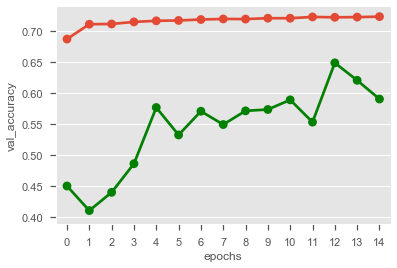

In [0]:

df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['accuracy'], 'val_accuracy': history.history['val_accuracy']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="val_accuracy", data=df, fit_reg=False, color='green')

In [0]:
#save model to JSON so I don't need to train again on above cell
model_json = model_lstm.to_json()
with open("model_lstm_15epochs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_lstm.save_weights("model_lstm_15epochs.h5")
print("Saved model to disk")

1523

Saved model to disk


In [0]:
history_20_epochs = model_lstm.fit(X_train, y_train_RS.values, validation_data=(X_test, y_test.values), epochs=30, batch_size=64)

Train on 147684 samples, validate on 18575 samples
Epoch 1/30
147684/147684 [==============================] - 7s 44us/step - loss: 0.6192 - accuracy: 0.6833 - val_loss: 0.7206 - val_accuracy: 0.5152
Epoch 2/30
147684/147684 [==============================] - 5s 35us/step - loss: 0.5813 - accuracy: 0.7093 - val_loss: 0.7134 - val_accuracy: 0.5100
Epoch 3/30
147684/147684 [==============================] - 6s 40us/step - loss: 0.5727 - accuracy: 0.7123 - val_loss: 0.6887 - val_accuracy: 0.5345
Epoch 4/30
147684/147684 [==============================] - 5s 34us/step - loss: 0.5681 - accuracy: 0.7138 - val_loss: 0.8117 - val_accuracy: 0.4668
Epoch 5/30
147684/147684 [==============================] - 5s 31us/step - loss: 0.5663 - accuracy: 0.7152 - val_loss: 0.7384 - val_accuracy: 0.5410
Epoch 6/30
147684/147684 [==============================] - 5s 31us/step - loss: 0.5654 - accuracy: 0.7157 - val_loss: 0.6974 - val_accuracy: 0.5786
Epoch 7/30
147684/147684 [=============================

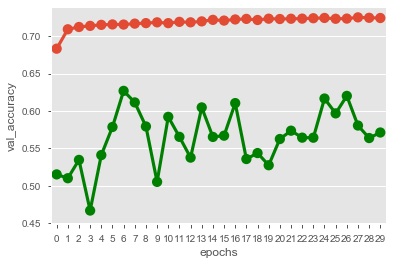

In [0]:

df = pd.DataFrame({'epochs':history_20_epochs.epoch, 'accuracy': history_20_epochs.history['accuracy'], 'val_accuracy': history_20_epochs.history['val_accuracy']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="val_accuracy", data=df, fit_reg=False, color='green')

In [0]:
#save model to JSON so I don't need to train again on above cell
model_json = model_lstm.to_json()
with open("model_lstm_30epochs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_lstm.save_weights("model_lstm_30epochs.h5")
print("Saved model to disk")

1523

Saved model to disk


## 3.2 MLP (Multi layered Perceptron)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dropout

In [0]:
model_MLP = Sequential()

model_MLP = Sequential()
model_MLP.add(Dense(128, activation='relu', input_shape=(data_training_RS.shape[1],)))
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(64, activation='relu'))
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(1,activation='sigmoid'))
adm = Adam(lr=0.001)
model_MLP.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
print(model_MLP.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history_mlp = model_MLP.fit(data_training_RS, y_train_RS.values, validation_data=(data_test, y_test.values), epochs=50, batch_size=64)

Train on 147684 samples, validate on 18575 samples
Epoch 1/50
147684/147684 [==============================] - 5s 33us/step - loss: 0.5529 - accuracy: 0.7463 - val_loss: 0.6085 - val_accuracy: 0.6408
Epoch 2/50
147684/147684 [==============================] - 4s 27us/step - loss: 0.5402 - accuracy: 0.7513 - val_loss: 0.4701 - val_accuracy: 0.7405
Epoch 3/50
147684/147684 [==============================] - 4s 27us/step - loss: 0.5293 - accuracy: 0.7554 - val_loss: 0.4768 - val_accuracy: 0.7715
Epoch 4/50
147684/147684 [==============================] - 4s 27us/step - loss: 0.5174 - accuracy: 0.7638 - val_loss: 0.4441 - val_accuracy: 0.7564
Epoch 5/50
147684/147684 [==============================] - 4s 27us/step - loss: 0.5103 - accuracy: 0.7673 - val_loss: 0.4645 - val_accuracy: 0.7231
Epoch 6/50
147684/147684 [==============================] - 4s 27us/step - loss: 0.5064 - accuracy: 0.7690 - val_loss: 0.4626 - val_accuracy: 0.7114
Epoch 7/50
147684/147684 [=============================

In [0]:
#save model to JSON so I don't need to train again on above cell
model_json = model_MLP.to_json()
with open("model_mlp_epochs_data_reworked.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_MLP.save_weights("model_mlp_epochs_data_reworked.h5")
print("Saved model to disk")

1915

Saved model to disk


In [0]:
y_pred = model_MLP.predict_classes(data_test)

In [0]:

confusion_matrix(y_train_RS, model_MLP.predict_classes(data_training_RS))


array([[57228, 16614],
       [16612, 57230]], dtype=int64)

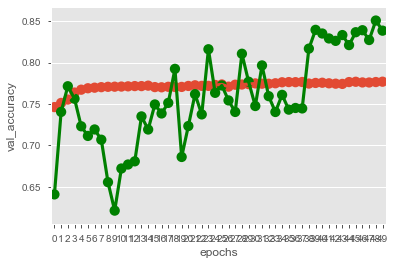

In [0]:
df = pd.DataFrame({'epochs':history_mlp.epoch, 'accuracy': history_mlp.history['accuracy'], 'val_accuracy': history_mlp.history['val_accuracy']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="val_accuracy", data=df, fit_reg=False, color='green')

In [0]:
model_MLP = Sequential()

model_MLP = Sequential()
model_MLP.add(Dense(128, activation='relu', input_shape=(data_training_RS.shape[1],)))
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(64, activation='relu'))
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(32, activation='relu'))
model_MLP.add(Dropout(0.2))
model_MLP.add(Dense(1,activation='sigmoid'))
adm = Adam(lr=0.001)
model_MLP.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
print(model_MLP.summary())

history_mlp = model_MLP.fit(data_training_RS, y_train_RS.values, validation_data=(data_test, y_test.values), epochs=50, batch_size=64)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

Epoch 47/50
147684/147684 [==============================] - 5s 33us/step - loss: 0.4818 - accuracy: 0.7740 - val_loss: 0.4749 - val_accuracy: 0.7838
Epoch 48/50
147684/147684 [==============================] - 4s 29us/step - loss: 0.4812 - accuracy: 0.7758 - val_loss: 0.4329 - val_accuracy: 0.8327
Epoch 49/50
147684/147684 [==============================] - 4s 29us/step - loss: 0.4820 - accuracy: 0.7743 - val_loss: 0.4421 - val_accuracy: 0.7868
Epoch 50/50
147684/147684 [==============================] - 4s 29us/step - loss: 0.4806 - accuracy: 0.7759 - val_loss: 0.4096 - val_accuracy: 0.8324


In [0]:
#save model to JSON so I don't need to train again on above cell
model_json = model_MLP.to_json()
with open("model_mlp_epochs_data_3_layers.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_MLP.save_weights("model_mlp_epochs_data_3_layers.h5")
print("Saved model to disk")

2548

Saved model to disk


In [0]:
from sklearn.metrics import classification_report

y_pred = model_MLP.predict(data_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test.values, y_pred_bool))

18575/18575 [==============================] - 0s 13us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18472
           1       0.00      0.00      0.00       103

    accuracy                           0.99     18575
   macro avg       0.50      0.50      0.50     18575
weighted avg       0.99      0.99      0.99     18575



C:\Users\Darry\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from keras.models import model_from_json
json_file = open('model_mlp_epochs_data_reworked.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_mlp_epochs_data_reworked.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(data_test, y_test.values, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 83.86%


In [0]:
y_pred = model_MLP.predict(data_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test.values, y_pred_bool))

18575/18575 [==============================] - 0s 7us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18472
           1       0.00      0.00      0.00       103

    accuracy                           0.99     18575
   macro avg       0.50      0.50      0.50     18575
weighted avg       0.99      0.99      0.99     18575



C:\Users\Darry\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
confusion_matrix(y_test.values, y_pred_bool)

array([[18472,     0],
       [  103,     0]], dtype=int64)

In [0]:
json_file = open('model_mlp_epochs_better.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_mlp_epochs_better.h5")
print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(data_test, y_test.values, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 98.06%


In [0]:
y_pred = loaded_model.predict(data_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test.values, y_pred_bool))

18575/18575 [==============================] - 0s 8us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18472
           1       0.00      0.00      0.00       103

    accuracy                           0.99     18575
   macro avg       0.50      0.50      0.50     18575
weighted avg       0.99      0.99      0.99     18575



In [0]:
confusion_matrix(y_test.values, y_pred_bool)

array([[18472,     0],
       [  103,     0]], dtype=int64)

In [0]:
y_pred = loaded_model.predict(data_training_RS, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

classification_report(y_train_RS.values, y_pred_bool)

147684/147684 [==============================] - 1s 6us/step


C:\Users\Darry\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.50      1.00      0.67     73842\n           1       0.00      0.00      0.00     73842\n\n    accuracy                           0.50    147684\n   macro avg       0.25      0.50      0.33    147684\nweighted avg       0.25      0.50      0.33    147684\n'

In [0]:
print(classification_report(y_train_RS.values, y_pred_bool))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     73842
           1       0.00      0.00      0.00     73842

    accuracy                           0.50    147684
   macro avg       0.25      0.50      0.33    147684
weighted avg       0.25      0.50      0.33    147684

